<a href="https://colab.research.google.com/github/superti4r/learn_python/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

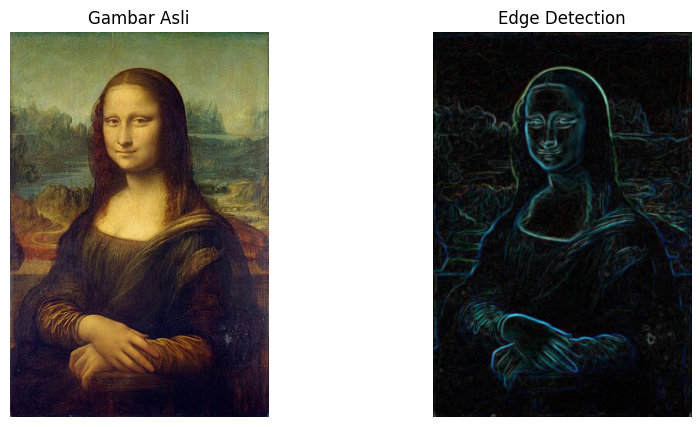

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'gambar.jpg'
try:
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Gambar tidak ditemukan.")
except FileNotFoundError as e:
    print(e)
    img = np.zeros((200, 200, 3), dtype=np.uint8)
    cv2.putText(img, "Gambar Tidak Ditemukan", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)


img_blur = cv2.GaussianBlur(img, (3, 3), 0)

img_blur_float = np.float32(img_blur)

sobelx = cv2.Sobel(img_blur_float, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_blur_float, cv2.CV_64F, 0, 1, ksize=5)

sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.show()